In [1]:
import numpy as np
from numpy import pi
import matplotlib.pyplot as plt
%matplotlib inline

def airy(x,phi0=0,beta=1,m=50):
    f = lambda x: beta/(1+m*np.sin(x+phi0)**2)
    return f(x) - f(0)

Text(0, 0.5, 'Airy, $f(x)-f(0)$')

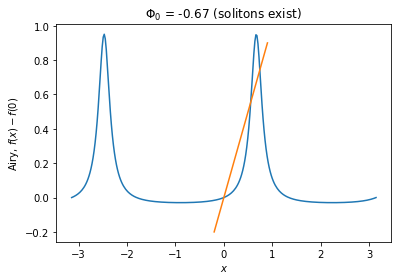

In [2]:
phi0 = -0.67
xs = np.linspace(-pi,pi,300)
plt.plot(xs, airy(xs, phi0=phi0))
plt.plot([-0.2,0.9],[-0.2,0.9])
plt.title('$\Phi_0$ = %.2f (solitons exist)' % phi0)
plt.xlabel('$x$')
plt.ylabel('Airy, $f(x)-f(0)$')

Text(0, 0.5, 'Airy, $f(x)-f(0)$')

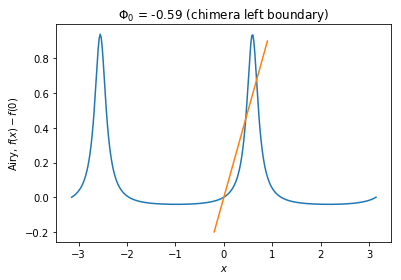

In [3]:
phi0 = -0.59
xs = np.linspace(-pi,pi,300)
plt.plot(xs, airy(xs, phi0=phi0))
plt.plot([-0.2,0.9],[-0.2,0.9])
plt.title('$\Phi_0$ = %.2f (chimera left boundary)' % phi0)
plt.xlabel('$x$')
plt.ylabel('Airy, $f(x)-f(0)$')

Text(0, 0.5, 'Airy, $f(x)-f(0)$')

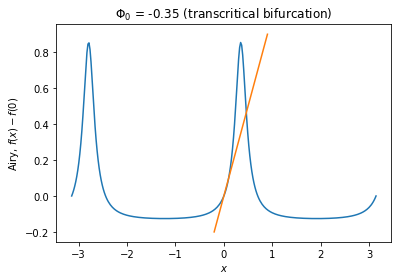

In [4]:
phi0 = -0.35
xs = np.linspace(-pi,pi,300)
plt.plot(xs, airy(xs,phi0=phi0))
plt.plot([-0.2,0.9],[-0.2,0.9])
plt.title('$\Phi_0$ = %.2f (transcritical bifurcation)' % phi0)
plt.xlabel('$x$')
plt.ylabel('Airy, $f(x)-f(0)$')

Download and install bokeh before running the cell below. Use sliders to change the values of $\Phi_0$ and $m$.

In [5]:
from bokeh.layouts import row, widgetbox
from bokeh.models import CustomJS, Slider
from bokeh.plotting import figure, output_file, output_notebook, show, ColumnDataSource

xs = np.linspace(-pi/2,pi/2,300)
ys = airy(xs, phi0=-0.67)
source = ColumnDataSource(data=dict(x=xs, y=ys))

xs2 = [-0.2, 1.1]
ys2 = xs2
source2 = ColumnDataSource(data=dict(x=xs2, y=ys2))

plot = figure(y_range=(-0.2, 1.1), plot_width=600, plot_height=400)

plot.line('x', 'y', source=source, line_width=2, line_alpha=0.9)
plot.line('x', 'y', line_color='orange', source=source2, line_width=2.5, line_alpha=0.9)

callback = CustomJS(args=dict(source=source), code="""
    var data = source.data
    var phi = phase.value
    var beta = 1
    var m = m.value
    var x = data['x']
    var y = data['y']
    var airy = function(x){
      return beta / ( 1 + m * Math.pow(Math.sin(x + phi),2) )
    }
    for (var i = 0; i < x.length; i++) {
        y[i] = airy(x[i]) - airy(0);
    }
    source.change.emit();
""")

phase_slider = Slider(start=-3.14, end=3.15, value=-0.67, step=.01,
                      title="$\Phi_0$", callback=callback)
callback.args["phase"] = phase_slider

m_slider = Slider(start=3, end=60, value=50, step=.2,
                      title="m", callback=callback)
callback.args["m"] = m_slider

layout = row(
    plot,
    widgetbox(phase_slider, m_slider),
)

output_notebook()
output_file("Airy_map.html", title="Airy map")

show(layout)

Loading BokehJS ...